In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df_train = pd.read_csv("data/train_dataset_train.csv")
df_user = pd.read_csv("data/user_decision.csv")

Text(0.5, 1.0, 'Распределение периода')

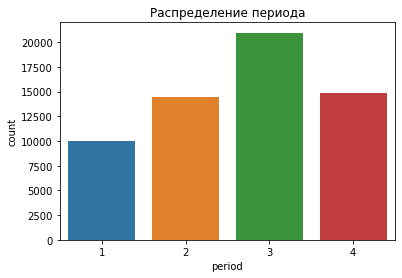

In [3]:
sns.countplot(x="period" , data=df_user).set_title('Распределение периода')

Text(0.5, 1.0, 'Распределение действий')

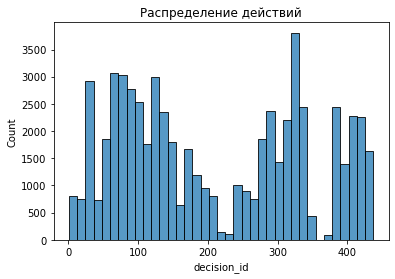

In [4]:
sns.histplot(df_user["decision_id"]).set_title('Распределение действий')

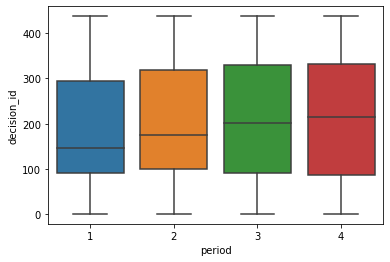

In [5]:
sns.boxplot(data=df_user, x="period", y="decision_id")

In [7]:
team_points = pd.read_csv("data/team_point.csv")
usr = pd.read_csv("data/user.csv")
team_points_usr = usr.merge(team_points, how="left", left_on="team_id", right_on="team_id")

Text(0.5, 1.0, 'Распределение периода')

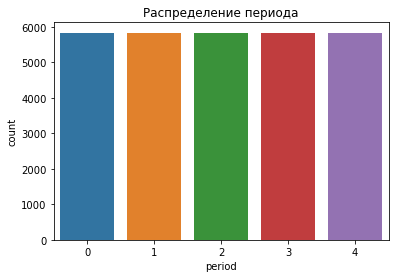

In [8]:
sns.countplot(x="period" , data=team_points_usr).set_title('Распределение периода')

Text(0.5, 1.0, 'Распределение действий')

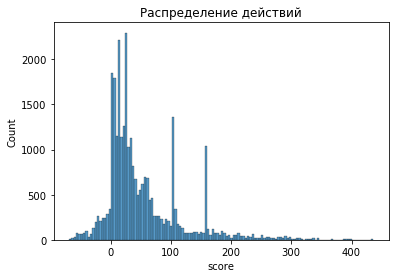

In [9]:
sns.histplot(x="score" , data=team_points_usr).set_title('Распределение действий')

Text(0.5, 1.0, 'Распределение действий')

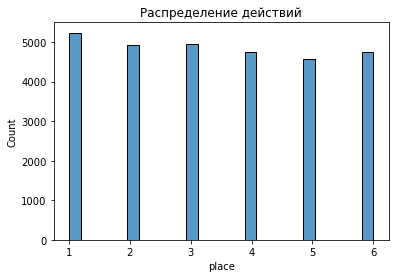

In [10]:
sns.histplot(x="place" , data=team_points_usr).set_title('Распределение действий')

In [11]:
b = pd.pivot(team_points_usr[team_points_usr["period"].isin([0, 1, 2, 3])],
             index=["user_id"],
             columns=['category_id', "period"],
             values="score").reset_index()

In [15]:
score_per_period = pd.DataFrame(data=b.drop("user_id", axis=1).values,
                                columns=[f'{i}_per_{j}_score' for i in range(1, 7) for j in range(4)],
                                index=b["user_id"])
score_per_period

,1_per_0_score,1_per_1_score,1_per_2_score,1_per_3_score,2_per_0_score,2_per_1_score,2_per_2_score,2_per_3_score,3_per_0_score,3_per_1_score,...,4_per_2_score,4_per_3_score,5_per_0_score,5_per_1_score,5_per_2_score,5_per_3_score,6_per_0_score,6_per_1_score,6_per_2_score,6_per_3_score
user_id,,,,,,,,,,,,,,,,,,,,,
10001,107,40,24,32,79,8,328,68,246,29,...,291,103,41,16,42,158,123,56,36,4
10002,66,46,83,2,7,8,282,47,299,13,...,118,103,65,16,43,158,104,20,53,4
10003,57,12,-55,2,10,8,44,-20,12,25,...,110,103,-53,16,-26,158,54,51,14,4
10004,70,10,14,7,23,8,16,-21,112,24,...,142,103,-61,16,5,158,47,41,14,4
10005,62,12,1,1,5,8,20,-23,100,18,...,114,103,-56,16,1,158,49,38,22,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10969,105,28,76,28,74,8,181,12,292,17,...,276,103,5,16,40,158,111,25,54,4
10970,54,32,-35,-5,-9,8,190,10,53,34,...,83,103,35,16,-18,158,56,57,23,4
10971,74,44,48,26,76,8,214,18,214,50,...,255,103,23,16,21,158,67,62,35,4


In [17]:
team_points_usr_gr = team_points_usr.groupby(["user_id", "game_id", "team_id"])["period"].apply(list).reset_index()
team_points_usr_gr

,user_id,game_id,team_id,period
0,10001,192,1366,"[2, 2, 3, 3, 3, 4, 1, 1, 0, 1, 3, 4, 0, 1, 2, ..."
1,10002,236,1682,"[1, 0, 0, 3, 0, 1, 0, 3, 3, 4, 1, 2, 3, 3, 3, ..."
2,10003,234,1652,"[2, 2, 0, 2, 0, 4, 1, 0, 0, 1, 3, 4, 2, 3, 1, ..."
3,10004,206,1472,"[4, 3, 3, 3, 4, 0, 4, 2, 1, 3, 2, 1, 2, 0, 1, ..."
4,10005,219,1602,"[1, 3, 2, 3, 2, 1, 2, 3, 4, 0, 0, 0, 1, 3, 3, ..."
...,...,...,...,...
968,10969,238,1702,"[2, 2, 4, 3, 1, 1, 4, 2, 0, 1, 4, 4, 0, 0, 0, ..."
969,10970,193,1378,"[2, 4, 1, 0, 0, 4, 3, 1, 2, 0, 2, 2, 3, 0, 0, ..."
970,10971,219,1598,"[1, 0, 0, 4, 1, 1, 4, 1, 0, 2, 3, 3, 3, 1, 3, ..."
971,10972,209,1508,"[0, 0, 2, 3, 1, 2, 0, 2, 4, 3, 0, 1, 1, 4, 0, ..."
